In [10]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

train_df = pd.read_csv("/content/drive/MyDrive/train.txt", sep=";", names=["text", "label"])
test_df = pd.read_csv("/content/drive/MyDrive/test.txt", sep=";", names=["text", "label"])
val_df = pd.read_csv("/content/drive/MyDrive/val.txt", sep=";", names=["text", "label"])
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|@\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text
df["clean_text"] = df["text"].apply(clean_text)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,clean_text
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.96      0.32      0.48       540
        fear       0.89      0.25      0.39       442
         joy       0.62      0.98      0.76      1335
        love       0.96      0.07      0.12       332
     sadness       0.71      0.93      0.80      1195
    surprise       1.00      0.01      0.03       156

    accuracy                           0.68      4000
   macro avg       0.86      0.43      0.43      4000
weighted avg       0.76      0.68      0.61      4000



In [12]:
def predict_emotion(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    return model.predict(vector)[0]

# Test
predict_emotion("I'm feeling hopeful and grateful today.")


np.str_('joy')

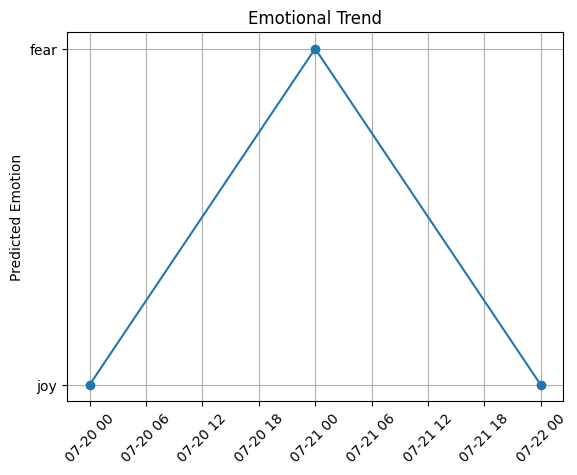

In [13]:
import matplotlib.pyplot as plt
import datetime

journal = [
    {"date": "2025-07-20", "text": "I'm excited about the new opportunity."},
    {"date": "2025-07-21", "text": "Feeling anxious about tomorrow's presentation."},
    {"date": "2025-07-22", "text": "I'm relaxed and had a good day."}
]

# Predict emotions
for entry in journal:
    entry["emotion"] = predict_emotion(entry["text"])

# Convert to DataFrame
journal_df = pd.DataFrame(journal)
journal_df["date"] = pd.to_datetime(journal_df["date"])

# Plot
plt.plot(journal_df["date"], journal_df["emotion"], marker="o")
plt.title("Emotional Trend")
plt.xticks(rotation=45)
plt.ylabel("Predicted Emotion")
plt.grid()
plt.show()
